In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cassinp/casstest.csv
/kaggle/input/cassinp/casstrain2.csv


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
train = pd.read_csv('/kaggle/input/cassinp/casstrain2.csv')

In [4]:
test = pd.read_csv('/kaggle/input/cassinp/casstest.csv')

In [5]:
train.shape

(12454, 21)

In [6]:
train.dropna(inplace = True)

In [7]:
train.shape


(12342, 21)

In [8]:
combined_data = pd.concat([train, test], ignore_index=True)

In [9]:
combined_data[12342:]

,id,uid,Location,Gender,Age,Height,Weight,Hash,FHO,CHCF,...,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,Obesity_Level
12342,10317,7w53s2NgM2arZAvM,Punjabi Bagh,Female,25.951979,1.669039,104.954291,##########,1.0,1,...,3.0,Sometimes,0,2.092326,0,0.043101,0.540812,Sometimes,Public_Transportation,NaN
12343,4074,kTLn00K8evgYXWxR,Hauz Khas,Female,40.993179,1.567973,81.022119,##########,1.0,1,...,3.0,Sometimes,0,1.005727,0,1.034031,0.000000,0,Automobile,NaN
12344,9060,81HX39uej0BR1xIl,Vasant Vihar,Male,21.000000,1.740000,76.0,##########,0.0,1,...,3.0,Sometimes,0,3.000000,0,1.000000,0.000000,Sometimes,Public_Transportation,NaN
12345,11286,DA9eqs9fs7wJUIet,Hauz Khas,Male,33.000000,1.680000,83.0,##########,1.0,1,...,1.0,Sometimes,0,2.000000,0,1.000000,0.000000,Sometimes,Automobile,NaN
12346,8254,SJ1Z7TBmojAPlJXd,SunderNagar,Female,35.194089,1.673482,73.193589,##########,1.0,0,...,3.0,Sometimes,0,1.572371,0,1.806740,0.000000,Sometimes,Automobile,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20641,5294,gb0h3fw2irbHfbQF,Punjabi Bagh,Female,20.000000,1.600000,42.0,##########,0.0,1,...,1.0,Frequently,0,1.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,NaN
20642,4473,0nYHoAUSo64MYow1,Vasant Vihar,Female,21.420537,1.739457,133.735889,##########,1.0,1,...,3.0,Sometimes,0,2.310921,0,1.618512,0.711331,Sometimes,Public_Transportation,NaN
20643,20603,fsY3VDGY5FxKByDJ,Punjabi Bagh,Female,18.000000,1.600000,60.0,##########,0.0,1,...,3.0,Always,0,2.000000,0,1.000000,0.000000,0,Public_Transportation,NaN
20644,10907,vYHNnxWeiuJA9SoJ,Vasant Vihar,Female,18.014333,1.624099,45.0,##########,0.0,1,...,3.0,Sometimes,0,2.000000,1,1.637368,0.105936,Sometimes,Public_Transportation,NaN


In [10]:
unique_obesity_levels = combined_data['Obesity_Level'].unique()
print(unique_obesity_levels)

['Overweight_Level_II' 'Obesity_Type_I' 'Obesity_Type_II'
 'Insufficient_Weight' 'Obesity_Type_III' 'Overweight_Level_I'
 'Normal_Weight' nan]


In [11]:
combined_data[:1]

,id,uid,Location,Gender,Age,Height,Weight,Hash,FHO,CHCF,...,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,Obesity_Level
0,14633,Q68lpI2C3l8tw2QW,SunderNagar,Male,23.0,1.7,83.0,##########,1.0,0,...,3.0,Sometimes,0,3.0,0,3.0,1.0,0,Walking,Overweight_Level_II


In [12]:
combined_data.shape

(20646, 21)

In [13]:
combined_data.drop(['uid','Hash'],axis=1,inplace=True)
combined_data.drop

<bound method DataFrame.drop of           id      Location  Gender        Age    Height      Weight  FHO  \
0      14633   SunderNagar    Male  23.000000  1.700000        83.0  1.0   
1      19443  Punjabi Bagh  Female  23.000000  1.600000        84.0  1.0   
2      10216     VikasPuri  Female  28.825223  1.549748   65.220249  1.0   
3       2016  Vasant Vihar    Male  25.341399  1.787195  115.428276  1.0   
4       9674  Vasant Vihar    Male  22.000000  1.750000        58.0  0.0   
...      ...           ...     ...        ...       ...         ...  ...   
20641   5294  Punjabi Bagh  Female  20.000000  1.600000        42.0  0.0   
20642   4473  Vasant Vihar  Female  21.420537  1.739457  133.735889  1.0   
20643  20603  Punjabi Bagh  Female  18.000000  1.600000        60.0  0.0   
20644  10907  Vasant Vihar  Female  18.014333  1.624099        45.0  0.0   
20645   8452     VikasPuri    Male  19.000000  1.750000        70.0  0.0   

       CHCF      CV  NCP        CAEC  SMOKE     Water  

In [14]:
combined_data[:1]

,id,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,Obesity_Level
0,14633,SunderNagar,Male,23.0,1.7,83.0,1.0,0,2.0,3.0,Sometimes,0,3.0,0,3.0,1.0,0,Walking,Overweight_Level_II


In [15]:
unique = combined_data['Mode'].unique()
print(unique)

['Walking' 'Public_Transportation' 'Automobile' 'Motorbike' 'Bike' ' ']


In [16]:
combined_data['Obesity_Level'] = combined_data['Obesity_Level'].map({
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Insufficient_Weight': 0,
    'Obesity_Type_III': 6,
    'Overweight_Level_I': 2,
    'Normal_Weight': 1
})

In [17]:
encoder = LabelEncoder()

# Identify columns with object dtype excluding 'Obesity_Level'
combined_data['Mode'].replace(' ', '0', inplace=True)
object_columns = combined_data.select_dtypes(include=['object'])

for column in object_columns:
    combined_data[column] = encoder.fit_transform(combined_data[column])

/tmp/ipykernel_26/2600003820.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['Mode'].replace(' ', '0', inplace=True)


In [18]:
combined_data['CA'].dtype

dtype('int64')

In [19]:
combined_data[:10]

,id,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,Obesity_Level
0,14633,2,1,23.000000,1.700000,1634,1.0,0,2.0000,3.0,3,0,3.000000,0,3.000000,1.000000,0,5,3.0
1,19443,1,0,23.000000,1.600000,1667,1.0,1,2.0000,3.0,3,0,3.000000,0,3.000000,0.000000,0,4,4.0
2,10216,4,0,28.825223,1.549748,1277,1.0,0,2.0000,3.0,3,0,1.984323,0,1.000000,0.000000,2,4,3.0
3,2016,3,1,25.341399,1.787195,513,1.0,1,2.9673,3.0,3,0,2.535127,0,0.849811,1.899330,2,4,5.0
4,9674,3,1,22.000000,1.750000,1189,0.0,1,2.0000,4.0,3,0,2.000000,0,2.000000,0.000000,0,4,0.0
5,19276,2,0,39.214514,1.584782,1511,1.0,1,2.0000,3.0,3,0,1.459511,0,0.000000,0.000000,0,1,4.0
6,14752,0,0,25.930376,1.715820,451,1.0,1,3.0000,3.0,3,0,2.738485,0,0.037202,0.153559,2,4,6.0
7,8359,3,1,29.000000,1.630000,1288,0.0,0,3.0000,3.0,2,0,2.000000,0,2.000000,1.000000,2,4,2.0
8,15537,1,0,18.000000,1.620000,1131,0.0,1,3.0000,3.0,3,0,1.000000,0,0.000000,1.000000,2,4,1.0
9,4604,1,0,25.722004,1.684768,132,1.0,1,3.0000,3.0,3,0,1.674061,0,0.167943,0.546137,2,4,6.0


In [20]:
# # Age & Gender
combined_data['Age_Gender'] = combined_data['Age'] * combined_data['Gender']

# Age & BMI
combined_data['Age_BMI'] = combined_data['Age'] * (combined_data['Weight'] / (combined_data['Height'] * combined_data['Height']))

# Water & BMI
combined_data['Water_BMI'] = combined_data['Water'] * (combined_data['Weight'] / (combined_data['Height'] * combined_data['Height']))


# CHCF & CBC
combined_data['CHCF_CBC'] = combined_data['CHCF'] * combined_data['CBC']

# CV & CA
combined_data['CV_CA'] = combined_data['CV'] * combined_data['CA']

# NCP & CAEC
combined_data['NCP_CAEC'] = combined_data['NCP'] * combined_data['CAEC']

# FAF & TI
combined_data['FAF_TI'] = combined_data['FAF'] * combined_data['TI']

# Mode of Transport & Physical Activity Frequency
combined_data['Mode_FAF'] = combined_data['Mode'] * combined_data['FAF']

# Height & Weight
combined_data['Height_Weight'] = combined_data['Height'] * combined_data['Weight']

import numpy as np
import pandas as pd

# Assuming 'combined_data' is your dataframe with features and 'target' is your multi-class label
# combined_data = your_data_here

# 2. Caloric Intake
combined_data['Caloric_Intake'] = combined_data['CHCF'] + combined_data['CV'] + combined_data['CBC']

# 3. Health Habits Score
combined_data['Health_Habits_Score'] = combined_data['SMOKE'] + combined_data['Water'] + combined_data['CHCF'] + combined_data['CV'] + combined_data['CBC'] + combined_data['CA'] + combined_data['FAF']

# 4. Sedentary Lifestyle Indicator
combined_data['Sedentary_Indicator'] = combined_data['FAF'] / (combined_data['TI']+1)

# 5. Dietary Balance Score
combined_data['Dietary_Balance_Score'] = combined_data['CV'] - combined_data['CAEC']

# 6. Transportation Impact - Requires additional analysis

# 7. Family Obesity History - Use FHO directly as a binary feature

# Assuming 'target' is your multi-class label
# target = your_target_here

# Now you can use the new features along with existing ones to train your model


# Display the modified DataFrame with new features
combined_data[:10]


,id,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,...,CHCF_CBC,CV_CA,NCP_CAEC,FAF_TI,Mode_FAF,Height_Weight,Caloric_Intake,Health_Habits_Score,Sedentary_Indicator,Dietary_Balance_Score
0,14633,2,1,23.000000,1.700000,1634,1.0,0,2.0000,3.0,...,0,0.0000,9.0,3.000000,15.000000,2777.800000,2.0000,8.000000,1.500000,-1.0000
1,19443,1,0,23.000000,1.600000,1667,1.0,1,2.0000,3.0,...,0,0.0000,9.0,0.000000,12.000000,2667.200000,3.0000,9.000000,3.000000,-1.0000
2,10216,4,0,28.825223,1.549748,1277,1.0,0,2.0000,3.0,...,0,4.0000,9.0,0.000000,4.000000,1979.028196,2.0000,6.984323,1.000000,-1.0000
3,2016,3,1,25.341399,1.787195,513,1.0,1,2.9673,3.0,...,0,5.9346,9.0,1.614072,3.399244,916.831035,3.9673,9.352238,0.293106,-0.0327
4,9674,3,1,22.000000,1.750000,1189,0.0,1,2.0000,4.0,...,0,0.0000,12.0,0.000000,8.000000,2080.750000,3.0000,7.000000,2.000000,-1.0000
5,19276,2,0,39.214514,1.584782,1511,1.0,1,2.0000,3.0,...,0,0.0000,9.0,0.000000,0.000000,2394.605602,3.0000,4.459511,0.000000,-1.0000
6,14752,0,0,25.930376,1.715820,451,1.0,1,3.0000,3.0,...,0,6.0000,9.0,0.005713,0.148808,773.834820,4.0000,8.775687,0.032250,0.0000
7,8359,3,1,29.000000,1.630000,1288,0.0,0,3.0000,3.0,...,0,6.0000,6.0,2.000000,8.000000,2099.440000,3.0000,9.000000,1.000000,1.0000
8,15537,1,0,18.000000,1.620000,1131,0.0,1,3.0000,3.0,...,0,6.0000,9.0,0.000000,0.000000,1832.220000,4.0000,7.000000,0.000000,0.0000
9,4604,1,0,25.722004,1.684768,132,1.0,1,3.0000,3.0,...,0,6.0000,9.0,0.091720,0.671772,222.389376,4.0000,7.842004,0.108621,0.0000


In [21]:
train = combined_data.iloc[:len(train)]
test= combined_data.iloc[len(train):]

In [22]:
test[:10]

,id,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,...,CHCF_CBC,CV_CA,NCP_CAEC,FAF_TI,Mode_FAF,Height_Weight,Caloric_Intake,Health_Habits_Score,Sedentary_Indicator,Dietary_Balance_Score
12342,10317,1,0,25.951979,1.669039,157,1.0,1,3.000000,3.000000,...,0,6.0,9.000000,0.023310,0.172404,262.039123,4.000000,8.135427,0.027973,0.000000
12343,4074,0,0,40.993179,1.567973,1560,1.0,1,2.921576,3.000000,...,0,0.0,9.000000,0.000000,1.034031,2446.037880,3.921576,5.961334,1.034031,-0.078424
12344,9060,3,1,21.000000,1.740000,1409,0.0,1,3.000000,3.000000,...,0,6.0,9.000000,0.000000,4.000000,2451.660000,4.000000,10.000000,1.000000,0.000000
12345,11286,0,1,33.000000,1.680000,1634,1.0,1,2.000000,1.000000,...,0,4.0,3.000000,0.000000,1.000000,2745.120000,3.000000,8.000000,1.000000,-1.000000
12346,8254,2,0,35.194089,1.673482,1361,1.0,0,3.000000,3.000000,...,0,6.0,9.000000,0.000000,1.806740,2277.609002,3.000000,8.379111,1.806740,0.000000
12347,13071,3,0,23.000000,1.600000,1865,1.0,1,2.000000,3.000000,...,0,0.0,9.000000,0.000000,4.000000,2984.000000,3.000000,7.000000,1.000000,-1.000000
12348,11417,3,1,18.000000,1.760000,1164,0.0,1,2.000000,4.000000,...,0,4.0,12.000000,2.000000,8.000000,2048.640000,3.000000,9.000000,1.000000,-1.000000
12349,6315,4,1,33.000000,1.700000,1667,1.0,0,3.000000,3.000000,...,0,6.0,9.000000,0.000000,0.000000,2833.900000,3.000000,8.000000,0.000000,0.000000
12350,14351,4,0,22.978655,1.663632,892,1.0,1,3.000000,3.000000,...,0,6.0,9.000000,1.197017,5.677892,1483.959744,4.000000,9.827915,0.770079,0.000000
12351,18914,0,0,23.455324,1.557943,1502,1.0,0,1.766849,2.865657,...,0,0.0,8.596971,1.569999,3.962568,2340.030386,1.766849,3.757491,0.383252,-1.233151


In [23]:
train.drop(['id'],axis=1,inplace=True)

/tmp/ipykernel_26/2706856098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['id'],axis=1,inplace=True)


In [24]:


# Assuming df_test contains your test data
# Splitting test data into features (X_test) and labels (y_test)
X_train = train.drop(columns=['Obesity_Level'])
y_train = train['Obesity_Level']

# Splitting the test data into train and validation sets
# You can adjust the test_size and random_state parameters as needed
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


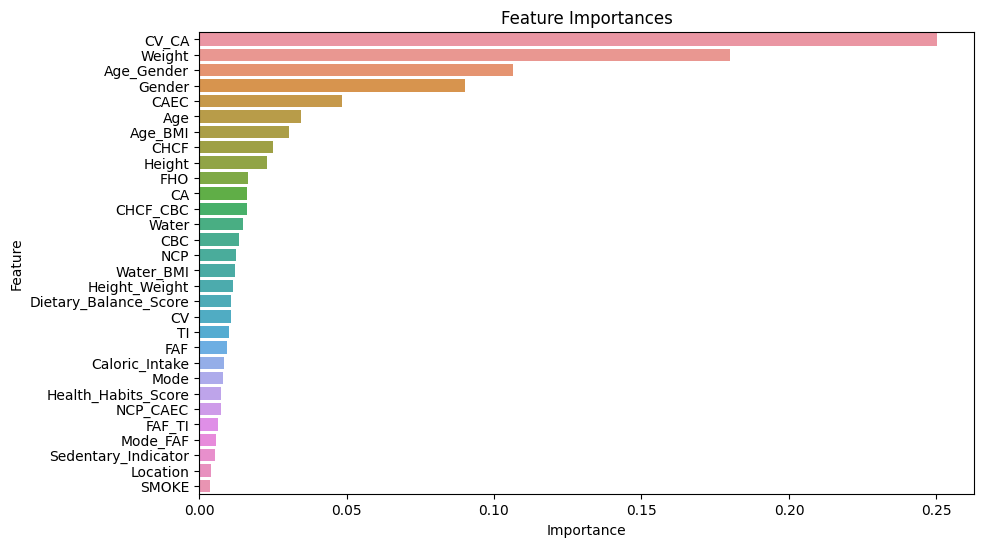

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

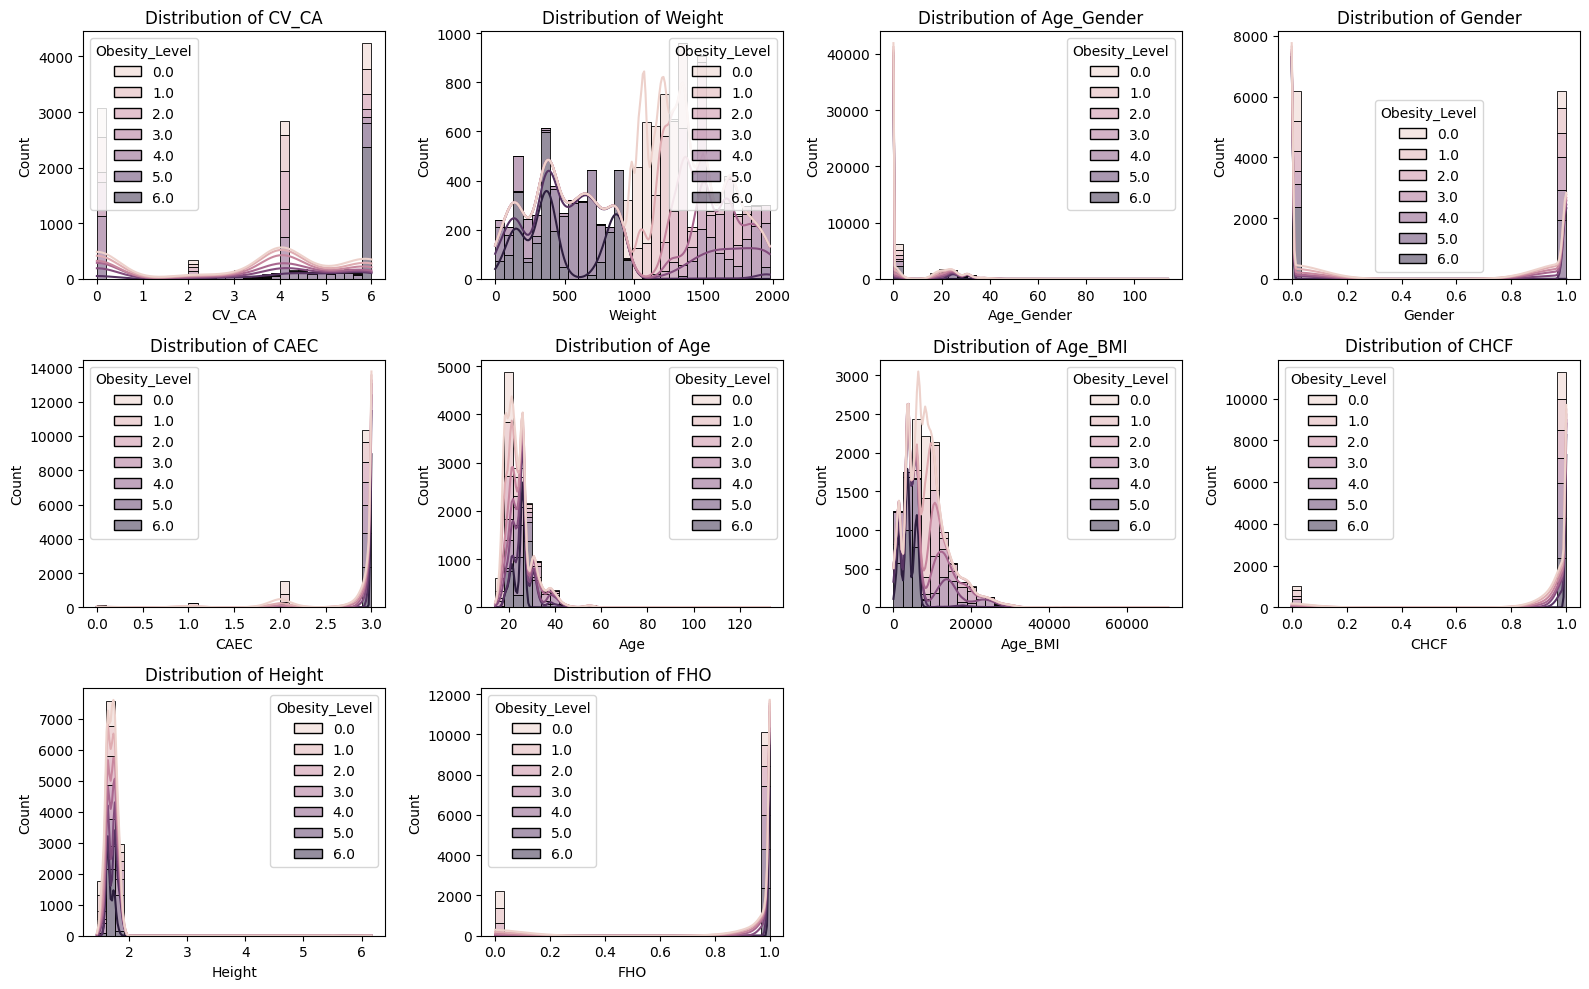

ANOVA test for CV_CA: F-statistic=912.4234060361229, p-value=0.0
ANOVA test for Weight: F-statistic=3120.8977295977998, p-value=0.0
ANOVA test for Age_Gender: F-statistic=1704.3044035705072, p-value=0.0
ANOVA test for Gender: F-statistic=1290.0855166557997, p-value=0.0
ANOVA test for CAEC: F-statistic=399.4687914330702, p-value=0.0
ANOVA test for Age: F-statistic=424.9290397737179, p-value=0.0
ANOVA test for Age_BMI: F-statistic=1645.9281469487025, p-value=0.0
ANOVA test for CHCF: F-statistic=164.0284785611577, p-value=2.546887434457741e-201
ANOVA test for Height: F-statistic=167.24849986815346, p-value=3.4602107051002254e-205
ANOVA test for FHO: F-statistic=928.9403584142001, p-value=0.0


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your dataframe with features and 'target' is your multi-class label
data = train.copy()

# Encode categorical features if necessary
categorical_features = data.select_dtypes(include=['object']).columns
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    data[feature] = label_encoders[feature].fit_transform(data[feature])

# Split the data into features and target
X_train = data.drop(columns=['Obesity_Level'])
y_train = data['Obesity_Level']

# Train an XGBoost Classifier to determine feature importances
clf = XGBClassifier()
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Select top features based on importance
num_top_features = 10  # Adjust as needed
top_features = feature_importance_df['Feature'].head(num_top_features)

# Plot distributions of top features by target classes
plt.figure(figsize=(16, 10))
for i, feature in enumerate(top_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data, x=feature, hue='Obesity_Level', multiple='stack', bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Perform statistical tests (e.g., ANOVA, Kruskal-Wallis) to compare feature distributions across target classes
# Example using ANOVA:
from scipy.stats import f_oneway

for feature in top_features:
    classes = data['Obesity_Level'].unique()
    feature_groups = {cls: data[feature][data['Obesity_Level'] == cls] for cls in classes}
    f_stat, p_value = f_oneway(*feature_groups.values())
    print(f"ANOVA test for {feature}: F-statistic={f_stat}, p-value={p_value}")


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score

In [27]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# # Gradient Boosting Classifier
# gb_classifier = GradientBoostingClassifier()
# gb_classifier.fit(X_train, y_train)
# gb_predictions = gb_classifier.predict(X_val)
# gb_f1_score = f1_score(y_val, gb_predictions, average='macro')
# print("Gradient Boosting F1 Score:", gb_f1_score)

# # AdaBoost Classifier
# ada_classifier = AdaBoostClassifier()
# ada_classifier.fit(X_train, y_train)
# ada_predictions = ada_classifier.predict(X_val)
# ada_f1_score = f1_score(y_val, ada_predictions, average='macro')
# print("AdaBoost F1 Score:", ada_f1_score)

# # K-Nearest Neighbors Classifier
# knn_classifier = KNeighborsClassifier()
# knn_classifier.fit(X_train, y_train)
# knn_predictions = knn_classifier.predict(X_val)
# knn_f1_score = f1_score(y_val, knn_predictions, average='macro')
# print("KNN F1 Score:", knn_f1_score)


# # Naive Bayes Classifier
# nb_classifier = GaussianNB()
# nb_classifier.fit(X_train, y_train)
# nb_predictions = nb_classifier.predict(X_val)
# nb_f1_score = f1_score(y_val, nb_predictions, average='macro')
# print("Naive Bayes F1 Score:", nb_f1_score)


# # RandomForestClassifier
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)
# rf_predictions = rf_classifier.predict(X_val)
# rf_f1_score = f1_score(y_val, rf_predictions, average='macro')
# print("Random Forest F1 Score:", rf_f1_score)

# XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_val)
xgb_f1_score = f1_score(y_val, xgb_predictions, average='macro')
print("XGBoost F1 Score:", xgb_f1_score)

# SVC
# svm_classifier = SVC()
# svm_classifier.fit(X_train, y_train)
# svm_predictions = svm_classifier.predict(X_val)
# svm_f1_score = f1_score(y_val, svm_predictions, average='macro')
# print("SVM F1 Score:", svm_f1_score)

XGBoost F1 Score: 0.9991045349857064


In [28]:
# from sklearn.preprocessing import StandardScaler

# # Initialize StandardScaler
# scaler = StandardScaler()

# # Scale the training features
# X_train_scaled = scaler.fit_transform(X_train)

# # Scale the validation features using the same scaler
# X_val_scaled = scaler.transform(X_val)



In [29]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from sklearn.metrics import f1_score

# # Check if GPU is available
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Enable GPU memory growth
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         print("GPU is available. Using GPU...")
#     except RuntimeError as e:
#         print(e)
# else:
#     print("GPU is not available. Using CPU...")

# # Define your neural network architecture
# model = models.Sequential([
#     layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(7, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_scaled, y_train, epochs=300, validation_data=(X_val_scaled, y_val))

# # Predict probabilities for the validation set
# y_pred_prob = model.predict(X_val_scaled)

# # Convert probabilities to class labels
# y_pred = y_pred_prob.argmax(axis=1)

# # Compute F1 score
# f1 = f1_score(y_val, y_pred, average='macro')
# print('Validation F1 score:', f1)


In [30]:
test[:10]

,id,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,...,CHCF_CBC,CV_CA,NCP_CAEC,FAF_TI,Mode_FAF,Height_Weight,Caloric_Intake,Health_Habits_Score,Sedentary_Indicator,Dietary_Balance_Score
12342,10317,1,0,25.951979,1.669039,157,1.0,1,3.000000,3.000000,...,0,6.0,9.000000,0.023310,0.172404,262.039123,4.000000,8.135427,0.027973,0.000000
12343,4074,0,0,40.993179,1.567973,1560,1.0,1,2.921576,3.000000,...,0,0.0,9.000000,0.000000,1.034031,2446.037880,3.921576,5.961334,1.034031,-0.078424
12344,9060,3,1,21.000000,1.740000,1409,0.0,1,3.000000,3.000000,...,0,6.0,9.000000,0.000000,4.000000,2451.660000,4.000000,10.000000,1.000000,0.000000
12345,11286,0,1,33.000000,1.680000,1634,1.0,1,2.000000,1.000000,...,0,4.0,3.000000,0.000000,1.000000,2745.120000,3.000000,8.000000,1.000000,-1.000000
12346,8254,2,0,35.194089,1.673482,1361,1.0,0,3.000000,3.000000,...,0,6.0,9.000000,0.000000,1.806740,2277.609002,3.000000,8.379111,1.806740,0.000000
12347,13071,3,0,23.000000,1.600000,1865,1.0,1,2.000000,3.000000,...,0,0.0,9.000000,0.000000,4.000000,2984.000000,3.000000,7.000000,1.000000,-1.000000
12348,11417,3,1,18.000000,1.760000,1164,0.0,1,2.000000,4.000000,...,0,4.0,12.000000,2.000000,8.000000,2048.640000,3.000000,9.000000,1.000000,-1.000000
12349,6315,4,1,33.000000,1.700000,1667,1.0,0,3.000000,3.000000,...,0,6.0,9.000000,0.000000,0.000000,2833.900000,3.000000,8.000000,0.000000,0.000000
12350,14351,4,0,22.978655,1.663632,892,1.0,1,3.000000,3.000000,...,0,6.0,9.000000,1.197017,5.677892,1483.959744,4.000000,9.827915,0.770079,0.000000
12351,18914,0,0,23.455324,1.557943,1502,1.0,0,1.766849,2.865657,...,0,0.0,8.596971,1.569999,3.962568,2340.030386,1.766849,3.757491,0.383252,-1.233151


In [31]:
test_predictions = xgb_classifier.predict(test.drop(columns=['id', 'Obesity_Level']))

In [32]:
# Define the reverse mapping dictionary
reverse_mapping = {
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    0: 'Insufficient_Weight',
    6: 'Obesity_Type_III',
    2: 'Overweight_Level_I',
    1: 'Normal_Weight'
}

# Assuming your test predictions are stored in a variable named 'test_predictions'
# Convert numerical predictions back to string labels
test_predictions = [reverse_mapping[prediction] for prediction in test_predictions]

# Now 'test_predictions_string' contains the predictions converted back to the original string labels


In [33]:
results_df = pd.DataFrame({'ID': test['id'], 'Obesity_Level': test_predictions})

# Saving DataFrame to a CSV file
results_df.to_csv('predicted_obesity_levels8.csv', index=False)